In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns
import datetime 
from sklearn.preprocessing import StandardScaler

In [37]:
df = pd.read_csv('TATANS.csv', encoding= 'unicode_escape',index_col='Date',
                       parse_dates=True)

In [38]:
df.shape

(246, 6)

In [39]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-08,466.000000,471.899994,464.450012,468.250000,466.795135,10561754
2022-08-10,470.000000,477.200012,463.350006,475.549988,474.072449,13360759
2022-08-11,482.549988,485.000000,475.600006,476.649994,475.169037,12777503
2022-08-12,475.750000,481.450012,470.000000,477.549988,476.066223,13482890
2022-08-16,479.600006,491.399994,478.200012,489.850006,488.328033,16796376


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2022-08-08 to 2023-08-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       246 non-null    float64
 1   High       246 non-null    float64
 2   Low        246 non-null    float64
 3   Close      246 non-null    float64
 4   Adj Close  246 non-null    float64
 5   Volume     246 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.5 KB


In [41]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,246.000000,246.000000,246.000000,246.000000,246.000000,2.460000e+02
mean,468.212603,472.916465,462.736992,467.420326,466.015785,1.309174e+07
std,70.734376,71.414898,70.165152,70.871637,70.762090,7.577879e+06
min,380.250000,388.399994,375.200012,378.350006,377.174469,0.000000e+00
25%,418.362510,421.424996,413.062492,416.662499,415.367935,8.913037e+06
50%,439.600006,443.949997,435.074997,440.000000,438.632919,1.132581e+07
75%,506.500000,512.875015,503.650001,507.250008,505.673965,1.458494e+07
max,647.000000,665.400024,642.000000,644.299988,644.299988,6.336047e+07


In [42]:
df[['Open', 'High', 'Low','Adj Close','Close']].describe()

,Open,High,Low,Adj Close,Close
count,246.000000,246.000000,246.000000,246.000000,246.000000
mean,468.212603,472.916465,462.736992,466.015785,467.420326
std,70.734376,71.414898,70.165152,70.762090,70.871637
min,380.250000,388.399994,375.200012,377.174469,378.350006
25%,418.362510,421.424996,413.062492,415.367935,416.662499
50%,439.600006,443.949997,435.074997,438.632919,440.000000
75%,506.500000,512.875015,503.650001,505.673965,507.250008
max,647.000000,665.400024,642.000000,644.299988,644.299988


In [43]:

# updating our dataFrame to have only
# one column 'Close' as rest all columns
# are of no use for us at the moment
# using .to_frame() to convert pandas series
# into dataframe.
df = df['Close'].to_frame()
 
# calculating simple moving average
# using .rolling(window).mean() ,
# with window size = 30
df['SMA30'] = df['Close'].rolling(30).mean()
 
# removing all the NULL values using
# dropna() method
df.dropna(inplace=True)
 
# printing Dataframe
df

,Close,SMA30
Date,,
2022-09-21,427.649994,458.681667
2022-09-22,432.200012,457.480001
2022-09-23,423.100006,455.731668
2022-09-26,397.500000,453.093335
2022-09-27,398.799988,450.468335
...,...,...
2023-07-31,644.299988,606.821665
2023-08-01,643.650024,609.408333
2023-08-02,622.650024,610.721667


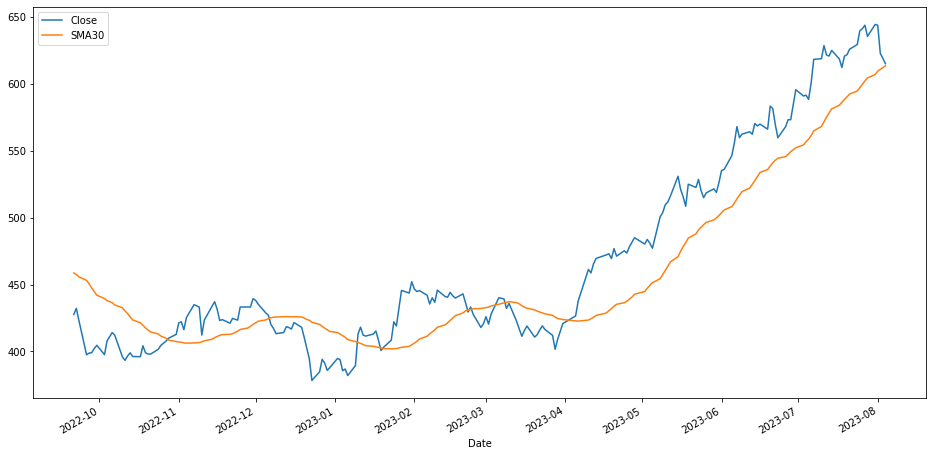

In [44]:

# plotting Close price and simple
# moving average of 30 days using .plot() method
df[['Close', 'SMA30']].plot(label='TATA',
                                  figsize=(16, 8))

In [45]:

# updating our dataFrame to have only
# one column 'Close' as rest all columns
# are of no use for us at the moment
# using .to_frame() to convert pandas series
# into dataframe.
df = df['Close'].to_frame()
 
# calculating cumulative moving
# average using .expanding().mean()
df['CMA30'] = df['Close'].expanding().mean()
 
# printing Dataframe
df

,Close,CMA30
Date,,
2022-09-21,427.649994,427.649994
2022-09-22,432.200012,429.925003
2022-09-23,423.100006,427.650004
2022-09-26,397.500000,420.112503
2022-09-27,398.799988,415.850000
...,...,...
2023-07-31,644.299988,465.503991
2023-08-01,643.650024,466.336449
2023-08-02,622.650024,467.063489


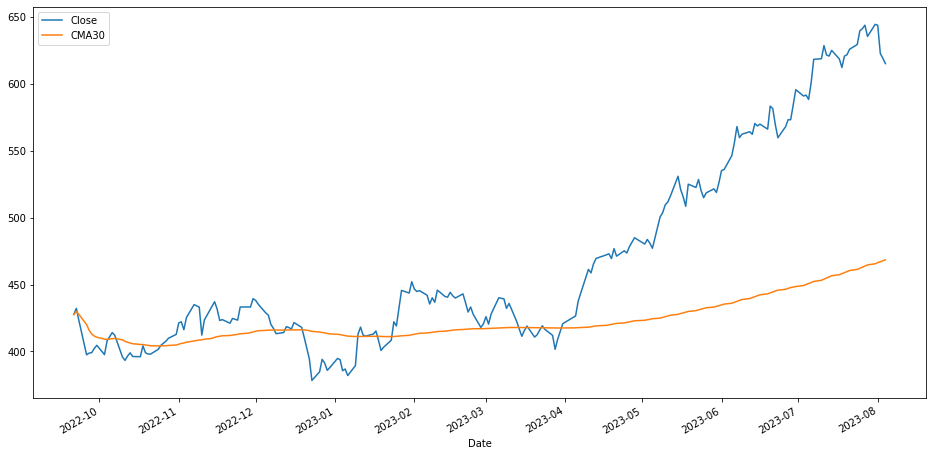

In [46]:

# plotting Close price and cumulative moving
# average of 30 days using .plot() method
df[['Close', 'CMA30']].plot(label='TATA',
                                  figsize=(16, 8))

In [47]:
# updating our dataFrame to have only
# one column 'Close' as rest all columns
# are of no use for us at the moment
# using .to_frame() to convert pandas
# series into dataframe.
df = df['Close'].to_frame()
 
# calculating exponential moving average
# using .ewm(span).mean() , with window size = 30
df['EWMA30'] = df['Close'].ewm(span=30).mean()
 
# printing Dataframe
df

,Close,EWMA30
Date,,
2022-09-21,427.649994,427.649994
2022-09-22,432.200012,430.000837
2022-09-23,423.100006,427.545561
2022-09-26,397.500000,419.266914
2022-09-27,398.799988,414.610193
...,...,...
2023-07-31,644.299988,607.994344
2023-08-01,643.650024,610.294712
2023-08-02,622.650024,611.091829


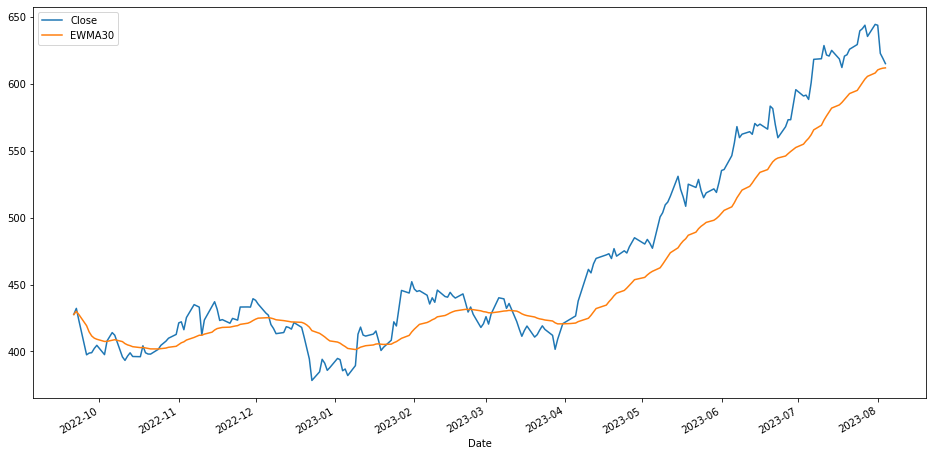

In [70]:
# plotting Close price and exponential
# moving averages of 30 days
# using .plot() method
df[['Close', 'EWMA30']].plot(label='TATA',
                                   figsize=(16, 8))